In [1]:
from collections import defaultdict

import matplotlib.pyplot as plt
from multiset import FrozenMultiset
import networkx as nx
import pandas as pd

/home/mzimmerman/local/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
def read_words(filename):
    out = []
    with open(filename, "r") as fh:
        for w in fh:
            w = w.strip()
            if len(w) >= 4:
                out.append(w)
    return out

words = read_words("enable1.txt")
words[:10]

['aahed',
 'aahing',
 'aahs',
 'aalii',
 'aaliis',
 'aals',
 'aardvark',
 'aardvarks',
 'aardwolf',
 'aardwolves']

In [3]:
len(words)

171752

In [5]:
m = FrozenMultiset(words[0])
m

FrozenMultiset({'a': 2, 'h': 1, 'e': 1, 'd': 1})

In [6]:
sets=dict()
towords=defaultdict(list)

In [7]:
for w in words:
    n=len(w)
    if n not in sets:
        sets[n]=set()
    anagram=FrozenMultiset(w)
    sets[n].add(anagram)
    towords[anagram].append(w)

In [8]:
worddist=pd.DataFrame(sorted(sets.keys()), columns=["i"])
worddist["n"]=worddist.apply(lambda x: len(sets[x["i"]]), axis=1)
worddist

,i,n
0,4,2674
1,5,6303
2,6,11958
3,7,19424
4,8,25434
5,9,23396
6,10,19708
7,11,15242
8,12,11231
9,13,7777


In [9]:
parents=dict()
parents[4]=dict()
for w in sets[4]:
    parents[4][w]=[]
    
def build_layer(n):
    m = n-1
    parents[n]=defaultdict(list)
    ncount=len(sets[n])
    mkeys=parents[m].keys()
    mcount=len(mkeys)
    print(f"mcount={mcount}")
    print(f"ncount={ncount}")
    for i, anagram_n in enumerate(sets[n]):
        if i%1000 == 0:
            print(i)
        for anagram_m in mkeys:
            if anagram_m.issubset(anagram_n):
                parents[n][anagram_n].append(anagram_m)

for n in range(5, 26):
    print(f"building layer {n}")
    build_layer(n)

building layer 5
mcount=2674
ncount=6303
0
1000
2000
3000
4000
5000
6000
building layer 6
mcount=5872
ncount=11958
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
building layer 7
mcount=10047
ncount=19424
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
building layer 8
mcount=14827
ncount=25434
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
building layer 9
mcount=16868
ncount=23396
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
building layer 10
mcount=13114
ncount=19708
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
building layer 11
mcount=7808
ncount=15242
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
building layer 12
mcount=3678
ncount=11

In [10]:
def count_parents(x):
    if x["i"] in parents:
        return len(parents[x["i"]])
    else:
        return 0

worddist["parents"]=worddist.apply(count_parents, axis=1)
worddist

,i,n,parents
0,4,2674,2674
1,5,6303,5872
2,6,11958,10047
3,7,19424,14827
4,8,25434,16868
5,9,23396,13114
6,10,19708,7808
7,11,15242,3678
8,12,11231,1430
9,13,7777,441


In [11]:
def anagram(ms):
    return "".join(ms)

# grab an example of a chain ending at 7 letters
k7=list(parents[7].keys())[0]

def print_tree(k, n):
    print(f"{anagram(k)} {towords[k]}")
    if n > 4:
        for pk in parents[n][k]:
            print_tree(pk, n-1)

print_tree(k7, 7)

cuteesi ['cutesie']
cuties ['cuties']
cutes ['cutes', 'scute']
cuts ['cuts', 'scut']
suet ['suet']
cues ['cues', 'ecus']
cute ['cute']
sect ['sect']
etuis ['etuis', 'suite']
etui ['etui']
suit ['suit', 'tuis']
suet ['suet']
site ['site', 'ties']
cutis ['cutis', 'ictus']
cist ['cist', 'tics']
suit ['suit', 'tuis']
cuts ['cuts', 'scut']
cesti ['cesti', 'cites']
cist ['cist', 'tics']
cite ['cite', 'etic']
ices ['ices', 'sice']
sect ['sect']
site ['site', 'ties']
cutie ['cutie']
etui ['etui']
cite ['cite', 'etic']
cute ['cute']


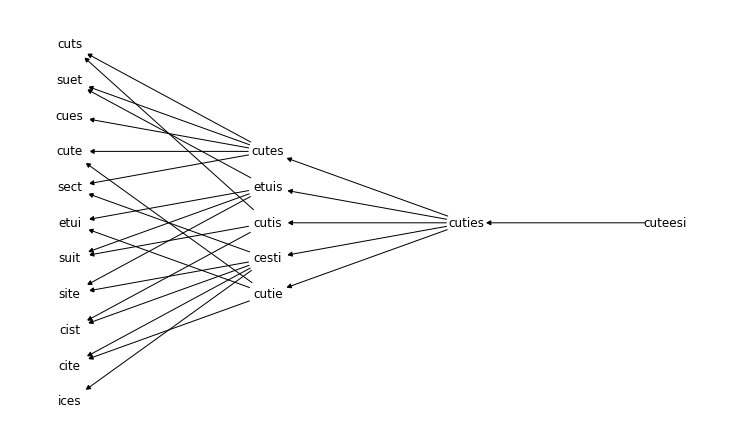

In [29]:
def create_graph(k, n):
    graph=nx.DiGraph()
    graph.add_node(anagram(k), layer=n)
    add_edges(graph, k, n)
    return graph
    
def add_edges(graph, k, n):
    if n > 4:
        for pk in parents[n][k]:
            graph.add_node(anagram(pk), layer=n-1)
            graph.add_edge(anagram(k), anagram(pk))
            add_edges(graph, pk, n-1)

def draw_graph(k, n, figsize=(10, 6)):
    fig = plt.figure(figsize=figsize)
    dg = create_graph(k, n)
    pos = nx.multipartite_layout(dg, subset_key='layer')
    nx.draw(dg, pos, with_labels=True, node_color='#ffffff', node_size=1500)
    
draw_graph(k7, 7)

In [24]:
k16s=list(parents[16].keys())
for k16 in k16s:
    print(f"{anagram(k16)} {towords[k16]}")

unndeerssttiimao ['underestimations']
iiinnndeettrmaos ['indeterminations']


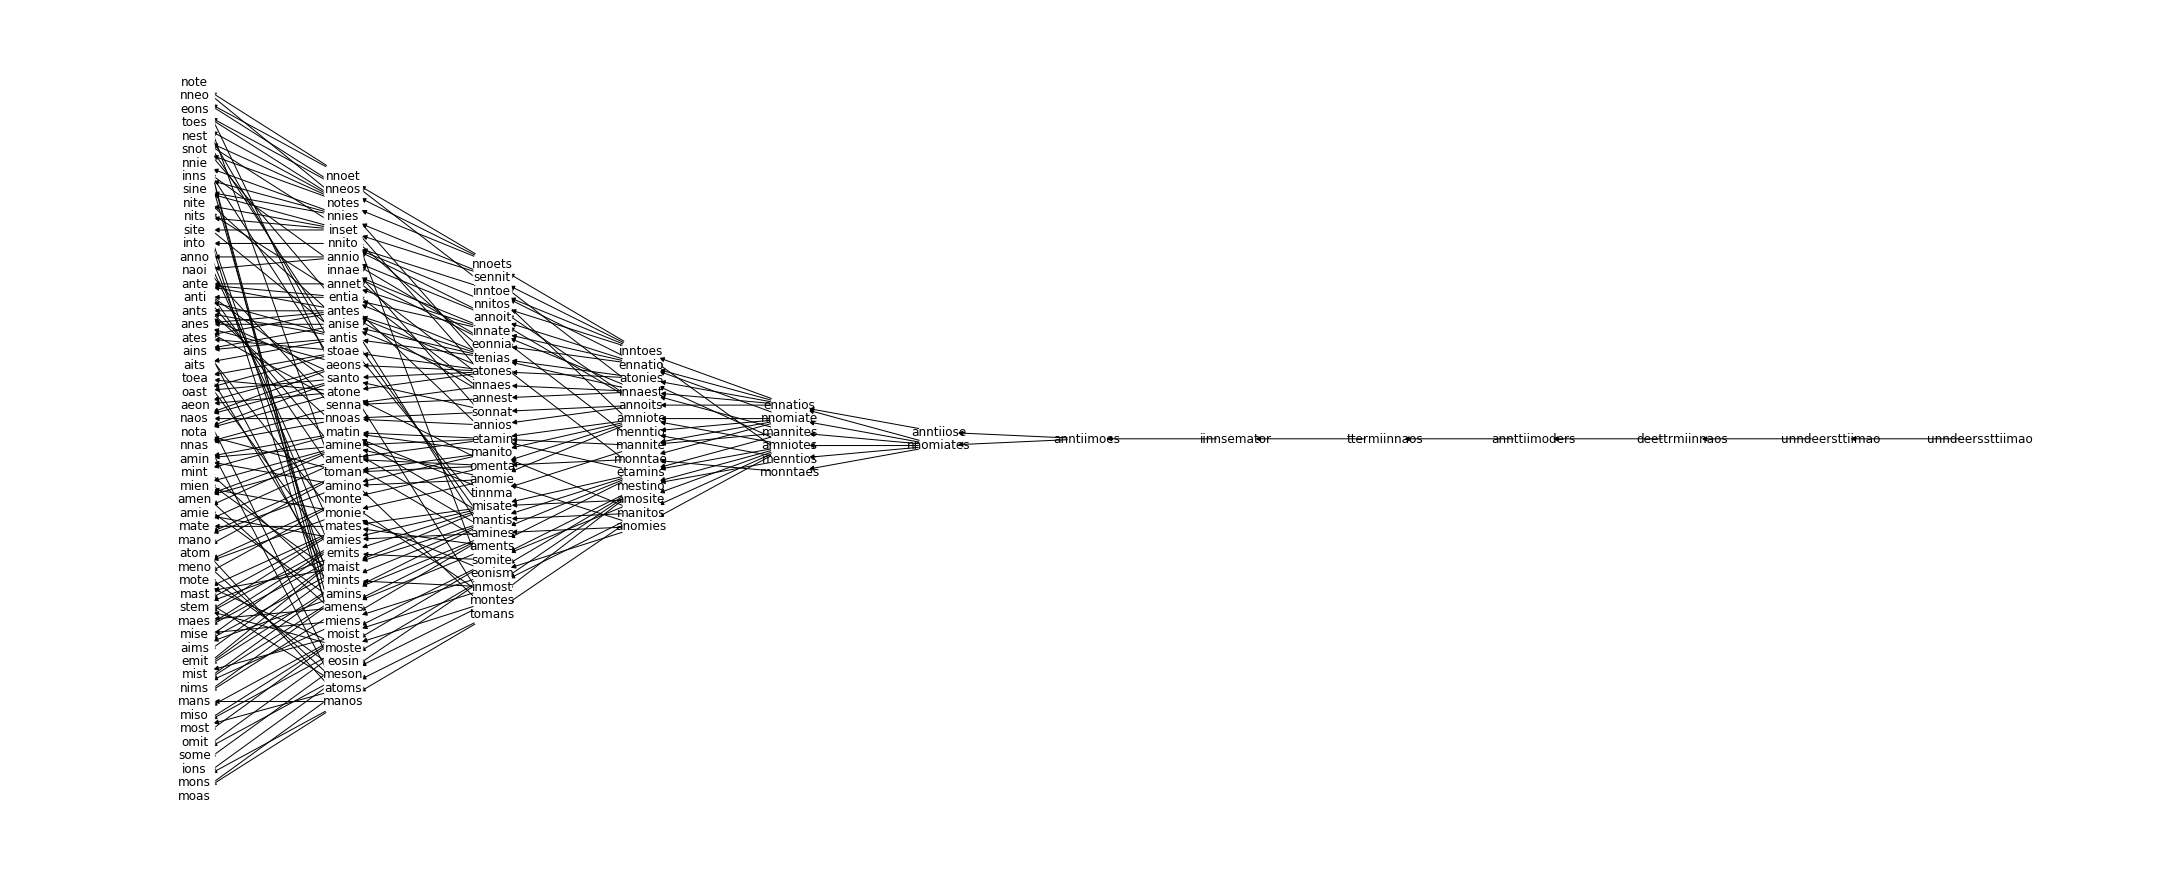

In [33]:
draw_graph(k16s[0], 16, figsize=(30, 12))

In [101]:
print_tree(k16s[0], 16)

iiinnndeettrmaos ['indeterminations']
iiinntteermdaos ['intermediations']
deettrmiinnaos ['determinations']
annttiimoders ['antimodernist']
ttermiinnaos ['terminations']
iinnsemator ['inseminator', 'nitrosamine']
anntiimoes ['antimonies', 'antinomies']
nnomiates ['nominates']
monntaes ['montanes']
monntae ['montane', 'nonmeat']
omenta ['omenta']
monte ['monte']
meno ['meno', 'nome', 'omen']
mote ['mote', 'tome']
note ['note', 'tone']
ament ['ament', 'meant', 'menta']
mate ['mate', 'meat', 'meta', 'tame', 'team']
ante ['ante', 'etna', 'neat']
amen ['amen', 'mane', 'mean', 'name', 'nema']
toman ['toman']
mano ['mano', 'moan', 'noma']
nota ['nota']
atom ['atom', 'moat']
atone ['atone', 'oaten']
aeon ['aeon']
toea ['toea']
ante ['ante', 'etna', 'neat']
nota ['nota']
note ['note', 'tone']
menntios ['mentions']
inntoes ['intones', 'tension']
inntoe ['intone']
nnito ['niton']
into ['into']
nnoet ['nonet', 'tenon', 'tonne']
note ['note', 'tone']
nneo ['neon', 'none']
nnoets ['nonets', 'sonnet'

In [102]:
print_tree(k16s[1], 16)

unndeerssttiimao ['underestimations']
unndeersttiimao ['underestimation']
deettrmiinnaos ['determinations']
annttiimoders ['antimodernist']
ttermiinnaos ['terminations']
iinnsemator ['inseminator', 'nitrosamine']
anntiimoes ['antimonies', 'antinomies']
nnomiates ['nominates']
monntaes ['montanes']
monntae ['montane', 'nonmeat']
omenta ['omenta']
monte ['monte']
meno ['meno', 'nome', 'omen']
mote ['mote', 'tome']
note ['note', 'tone']
ament ['ament', 'meant', 'menta']
mate ['mate', 'meat', 'meta', 'tame', 'team']
ante ['ante', 'etna', 'neat']
amen ['amen', 'mane', 'mean', 'name', 'nema']
toman ['toman']
mano ['mano', 'moan', 'noma']
nota ['nota']
atom ['atom', 'moat']
atone ['atone', 'oaten']
aeon ['aeon']
toea ['toea']
ante ['ante', 'etna', 'neat']
nota ['nota']
note ['note', 'tone']
menntios ['mentions']
inntoes ['intones', 'tension']
inntoe ['intone']
nnito ['niton']
into ['into']
nnoet ['nonet', 'tenon', 'tonne']
note ['note', 'tone']
nneo ['neon', 'none']
nnoets ['nonets', 'sonnet'